In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
class Thompson_sampler():
    def __init__(self, true_probs):
        self.true_probs = true_probs
        self.n_arms = len(true_probs)
        # Assume Beta(1,1) prior
        self.alpha, self.beta = np.ones(self.n_arms), np.ones(self.n_arms)
        # Track results
        self.rewards, self.choice = [], []

    def choose_arm(self):
        samples = [np.random.beta(self.alpha[i],self.beta[i])
                  for i in range(self.n_arms)]
        argmax = np.argmax(samples)
        self.choice.append(argmax)
        return argmax

    def update(self):
        chosen_arm = self.choose_arm()
        reward = 1 if np.random.random() < self.true_probs[chosen_arm] else 0
        if reward == 1:
            self.alpha[chosen_arm] += 1
        else: 
            self.beta[chosen_arm] += 1
        self.rewards.append(reward)

    def run(self, n_iter=100):
        self.plot(n_iter)
        for i in range(self.n_arms):
            print(f"Estimated probability: {np.round(self.alpha[i] / (self.alpha[i] + self.beta[i]), 3)}.")
            print(f"Estimated variance: {np.round(self.alpha[i]*self.beta[i]/
            ((self.alpha[i]+self.beta[i])**2 * (self.alpha[i]+self.beta[i] + 1)), 5)}.\n")

    def plot(self, n_iter=100):
        fig, ax = plt.subplots()
        
        def update_plot(i):
            ax.clear() 
            self.update()
            for arm in range(self.n_arms):
                y = np.random.beta(self.alpha[arm], self.beta[arm], size=1000)
                ax.hist(y, alpha=0.5, bins=50, label=f'Arm {arm+1} dist.', density=True)
                ax.legend(loc='upper left')
                ax.set_xlim([0,1])
                ax.set_ylim([0,20])
                ax.set_ylabel('Density', fontsize=12)
                ax.set_xlabel('Probability', fontsize=12)
                ax.set_title('Thompson sampling', fontsize=14)

        ani = animation.FuncAnimation(fig, update_plot, frames=n_iter, repeat=False)
        ani.save('Thompson_sampler.gif', writer='pillow')

        plt.plot()

Estimated probability: 0.25.
Estimated variance: 0.0375.

Estimated probability: 0.679.
Estimated variance: 0.00752.

Estimated probability: 0.8.
Estimated variance: 0.00091.



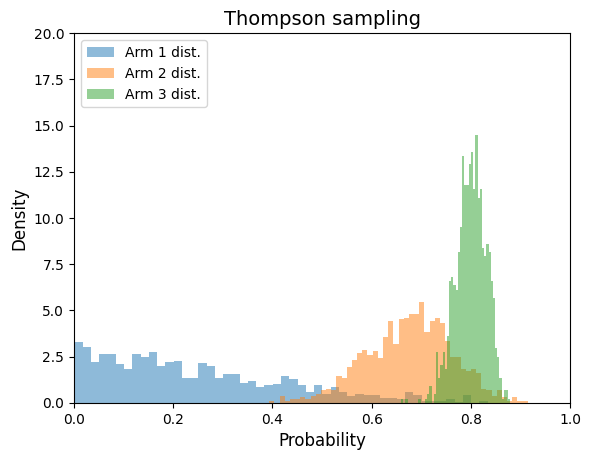

In [3]:
# Example run
np.random.seed(42)
n_iter = 200
true_probs = [0.3, 0.5, 0.8]
sampler = Thompson_sampler(true_probs)
sampler.run(n_iter)